# Data wrangling

You know the basics. What are Jupyter notebooks, how do they work, and
how do you run Python in them. It is time to start using them for data
science (no, that simple math you did the last time doesn’t count as
data science).

You are about to enter the PyData ecosystem. It means that you will
start learning how to work with Python from the middle. This course does
not explicitly cover the fundamentals of programming. It is expected
that those parts you need you’ll be able to pick as you go through the
specialised data science stack. If you’re stuck, confused or need
further explanation, use Google (or your favourite search engine), ask
AI to explain the code or ask on Discord or during the class. Not
everything will be told during the course (by design), and the internet
is a friend of every programmer, so let’s figure out how to use it
efficiently from the beginning.

Let’s dig in!

## Munging and wrangling

Real-world datasets are messy. There is no way around it: datasets have
“holes” (missing data), the amount of formats in which data can be
stored is endless, and the best structure to share data is not always
the optimum to analyse them, hence the need to
[munge](http://dictionary.reference.com/browse/munge)[1] them. As has
been correctly pointed out in many outlets, much of the time spent in
what is called Data Science is related not only to sophisticated
modelling and insight but has to do with much more basic and less exotic
tasks such as obtaining data, processing, and turning them into a shape
that makes analysis possible, and exploring it to get to know their
basic properties.

Surprisingly, very little has been published on patterns, techniques,
and best practices for quick and efficient data cleaning, manipulation,
and transformation because of how labour-intensive and relevant this
aspect is. In this session, you will use a few real-world datasets and
learn how to process them into Python so they can be transformed and
manipulated, if necessary, and analysed. For this, you will introduce
some of the bread and butter of data analysis and scientific computing
in Python. These are fundamental tools that are constantly used in
almost any task relating to data analysis.

This notebook covers the basics and the content that is expected to be
learnt by every student. You use a prepared dataset that saves us much
of the more intricate processing that goes beyond the introductory level
the session is aimed at. If you are interested in how it was done, there
is a
[notebook](https://github.com/martinfleis/sds/blob/main/data/chicago_influenza_1918/preprocessing.ipynb).

This notebook discusses several patterns to clean and structure data
properly, including tidying, subsetting, and aggregating. You finish
with some basic visualisation. An additional extension presents more
advanced tricks to manipulate tabular data.

## Dataset

You will be exploring demographic characteristics of Chicago in 1918
linked to the influenza mortality during the pandemic that happened back
then, coming from the research paper by @grantz2016disparities. The data
are aggregated to census tracts and contain information on unemployment,
home ownership, age structure and influenza mortality from a period of 8
weeks.

The main tool you use is the `pandas` package. As with the `math` you
used [before](../chapter_01/hands_on.qmd), you must import it first.

[1] Data munging and data wrangling are used interchangeably. Pick the
one you like.

In [1]:
import pandas as pd


The data is stored in a CSV file. To make things easier, you can read
data from a file posted online so, for now, you do not need to download
any dataset:

In [2]:
chicago_1918 = pd.read_csv(
    "https://martinfleischmann.net/sds/chapter_02/data/chicago_influenza_1918.csv",
    index_col="geography_code",
)


> **Tip**
>
> You are using `read_csv` because the file you want to read is in CSV
> format. However, `pandas` allows for many more formats to be read and
> write. A full list of formats supported may be found in [the
> documentation](https://pandas.pydata.org/docs/user_guide/io.html).

> **Alternative**
>
> Instead of reading the file directly off the web, it is possible to
> download it manually, store it on your computer, and read it locally.
> To do that, you can follow these steps:
>
> 1.  Download the file by right-clicking on [this
>     link](https://martinfleischmann.net/sds/chapter_02/data/chicago_influenza_1918.csv)
>     and saving the file
> 2.  Place the file in the same folder as the notebook where you intend
>     to read it
> 3.  Replace the code in the cell above with:
>
> ``` python
> chicago_1918 = pd.read_csv(
>     "chicago_influenza_1918.csv",
>     index_col="geography_code",
> )
> ```

## Pandas 101

Now, you are ready to start playing and interrogating the dataset! What
you have at your fingertips is a table summarising, for each of the
census tracts in Chicago more than a century ago, how many people lived
in each by age, accompanied by some other socioeconomic data and
influenza mortality. These tables are called `DataFrame` objects, and
they have a lot of functionality built-in to explore and manipulate the
data they contain. Let’s explore a few of those cool tricks!

### Data Structures

The first aspect worth spending a bit of time on is the structure of a
`DataFrame`. You can print it by simply typing its name:

In [3]:
chicago_1918

496 rows × 12 columns

Note the printing is cut to keep a nice and compact view but enough to
see its structure. Since they represent a table of data, `DataFrame`
objects have two dimensions: rows and columns. Each of these is
automatically assigned a name in what you will call its *index*. When
printing, the index of each dimension is rendered in bold, as opposed to
the standard rendering for the content. The example above shows how the
column index is automatically picked up from the `.csv` file’s column
names. For rows, we have specified when reading the file you wanted the
column `geography_code`, so that is used. If you hadn’t set any,
`pandas` would automatically generate a sequence starting in `0` and
going all the way to the number of rows minus one. This is the standard
structure of a `DataFrame` object, so you will come to it over and over.
Importantly, even when you move to spatial data, your datasets will have
a similar structure.

One final feature that is worth mentioning about these tables is that
they can hold columns with different types of data. In this example, you
have counts (or `int` for integer types) and ratios (or ‘float’ for
floating point numbers - a number with decimals) for each column. But it
is useful to keep in mind that you can combine this with columns that
hold other types of data such as categories, text (`str`, for string),
dates or, as you will see later in the course, geographic features.

To extract a single column from this `DataFrame`, specify its name in
the square brackets (`[]`). Note that the name, in this case, is a
`string`. A piece of text. As such, it needs to be within single (`'`)
or double quotes (`"`). The resulting data structure is no longer a
`DataFrame`, but you have a `Series` because you deal with a single
column.

In [4]:
chicago_1918["influenza"]

geography_code
G17003100001     9
G17003100002     6
G17003100003     8
G17003100004     2
G17003100005     7
                ..
G17003100492    12
G17003100493    40
G17003100494    85
G17003100495    15
G17003100496    30
Name: influenza, Length: 496, dtype: int64

### Inspect

Inspecting what it looks like. You can check the table’s top (or bottom)
X lines by passing X to the method `head` (`tail`). For example, for the
top/bottom five lines:

In [5]:
chicago_1918.head()

In [6]:
chicago_1918.tail()

Or get an overview of the table:

In [7]:
chicago_1918.info()

<class 'pandas.core.frame.DataFrame'>
Index: 496 entries, G17003100001 to G17003100496
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gross_acres     496 non-null    float64
 1   illit           496 non-null    int64  
 2   unemployed_pct  496 non-null    float64
 3   ho_pct          496 non-null    float64
 4   agecat1         496 non-null    int64  
 5   agecat2         496 non-null    int64  
 6   agecat3         496 non-null    int64  
 7   agecat4         496 non-null    int64  
 8   agecat5         496 non-null    int64  
 9   agecat6         496 non-null    int64  
 10  agecat7         496 non-null    int64  
 11  influenza       496 non-null    int64  
dtypes: float64(3), int64(9)
memory usage: 66.5+ KB

### Summarise

Or of the *values* of the table:

In [8]:
chicago_1918.describe()

Note how the output is also a `DataFrame` object, so you can do with it
the same things you would with the original table (e.g. writing it to a
file).

In this case, the summary might be better presented if the table is
“transposed”:

In [9]:
chicago_1918.describe().T

Equally, common descriptive statistics are also available. To obtain
minimum values for each column, you can use `.min()`.

In [10]:
chicago_1918.min()

gross_acres       6.9000
illit             0.0000
unemployed_pct    0.0578
ho_pct            0.0000
agecat1           0.0000
agecat2           3.0000
agecat3           1.0000
agecat4           4.0000
agecat5           0.0000
agecat6           8.0000
agecat7           6.0000
influenza         0.0000
dtype: float64

Or to obtain a minimum for a single column only.

In [11]:
chicago_1918["influenza"].min()

0

Note here how you have restricted the calculation of the minimum value
to one column only by getting the `Series` and calling `.min()` on that.

Similarly, you can restrict the calculations to a single row using
`.loc[]` indexer:

In [12]:
chicago_1918.loc["G17003100492"].max()

2176.6

### Create new columns

You can generate new variables by applying operations to existing ones.
For example, you can calculate the total population by area. Here are a
couple of ways to do it:

In [13]:
# This one is longer, hardcoded
total_population = (
    chicago_1918["agecat1"]
    + chicago_1918["agecat2"]
    + chicago_1918["agecat3"]
    + chicago_1918["agecat4"]
    + chicago_1918["agecat5"]
    + chicago_1918["agecat6"]
    + chicago_1918["agecat7"]
)
total_population.head()


geography_code
G17003100001    2819
G17003100002    3265
G17003100003    2256
G17003100004    2623
G17003100005    5528
dtype: int64

In [14]:
# This one is shorted, using a range of columns and sum
total_population = chicago_1918.loc[:, "agecat1":"agecat7"].sum(axis=1)
total_population.head()


geography_code
G17003100001    2819
G17003100002    3265
G17003100003    2256
G17003100004    2623
G17003100005    5528
dtype: int64

Once you have created the variable, you can make it part of the table:

In [15]:
chicago_1918["total_population"] = total_population
chicago_1918.head()


You can also do other mathematical operations on columns. These are
always automatically applied to individual values in corresponding rows.

In [16]:
homeowners = chicago_1918["total_population"] * chicago_1918["ho_pct"]
homeowners.head()


geography_code
G17003100001    351.875177
G17003100002    233.928353
G17003100003    209.628319
G17003100004     78.879711
G17003100005    468.237675
dtype: float64

In [17]:
pop_density = chicago_1918["total_population"] / chicago_1918["gross_acres"]
pop_density.head()


geography_code
G17003100001     2.030687
G17003100002    14.997703
G17003100003     5.621729
G17003100004    30.184120
G17003100005    16.398695
dtype: float64

A different spin on this is assigning new values: you can generate new
variables with scalars[1], and modify those:

[1] Scalar is a single value, like a number (`42`) or a string
(`"towel"`).

In [18]:
chicago_1918["ones"] = 1
chicago_1918.head()


And you can modify specific values too:

In [19]:
chicago_1918.loc["G17003100001", "ones"] = 3
chicago_1918.head()

### Remove columns

Permanently deleting variables is also within reach of one command:

In [20]:
chicago_1918 = chicago_1918.drop(columns="ones")
chicago_1918.head()

### Index-based queries

Here, you explore how to subset parts of a `DataFrame` if you know
exactly which bits you want. For example, if you want to extract the
influenza mortality and total population of the first four areas in the
table, you use `loc` with lists:

In [21]:
death_pop_first4 = chicago_1918.loc[
    ["G17003100001", "G17003100002", "G17003100003", "G17003100004"],
    ["influenza", "total_population"],
]
death_pop_first4


You can see how you can create a list with the names (index IDs) along
each of the two dimensions of a `DataFrame` (rows and columns), and
`loc` will return a subset of the original table only with the elements
queried for.

An alternative to list-based queries is what is called “range-based”
queries. These work on the indices of the table, but instead of
requiring the ID of each item you want to retrieve, they operate by
requiring only two IDs: the first and last element in a range of items.
Range queries are expressed with a colon (`:`). For example:

In [22]:
range_query = chicago_1918.loc[
    "G17003100010":"G17003100012",
    "influenza":'total_population',
]
range_query

The range query picks up all the elements between the specified IDs.
Note that for this to work, the first ID in the range needs to be placed
before the second one in the table’s index.

Once you know about list and range-based queries, you can combine them!
For example, you can specify a range of rows and a list of columns:

In [23]:
range_list_qry = chicago_1918.loc[
    "G17003100010":"G17003100012", ["influenza", "total_population"]
]

range_list_qry

### Condition-based queries

However, sometimes, you do not know exactly which observations you want,
but you do know what conditions they need to satisfy (e.g. areas with
more than 2,000 inhabitants). For these cases, `DataFrames` support
selection based on conditions. Let us see a few examples. Suppose you
want to select…

*… areas with more than 60 cases of influenza deaths:*

In [24]:
flu_over_60 = chicago_1918.loc[chicago_1918["influenza"] > 60]
flu_over_60

*… areas with less than 200 inhabitants:*

In [25]:
pop_under = chicago_1918.loc[chicago_1918["total_population"] < 200]
pop_under

*… areas with exactly a hundred illiterate persons:*

In [26]:
illit_100 = chicago_1918.loc[chicago_1918["illit"] == 100]
illit_100

> **Unlimited power**
>
> These queries can grow in sophistication with almost no limits. For
> example, here is a case where you want to find out the areas where the
> oldest age group is more than half the population:
>
> ``` python
> chicago_1918.loc[
>     (chicago_1918["agecat7"] * 100 / chicago_1918["total_population"]) > 50
> ]
> ```
>
> <div>
> <style scoped>
>     .dataframe tbody tr th:only-of-type {
>         vertical-align: middle;
>     }
>
>     .dataframe tbody tr th {
>         vertical-align: top;
>     }
>
>     .dataframe thead th {
>         text-align: right;
>     }
> </style>
>
> |                | gross_acres | illit | unemployed_pct | ho_pct   | agecat1 | agecat2 | agecat3 | agecat4 | agecat5 | agecat6 | agecat7 | influenza | total_population |
> |----------------|-------------|-------|----------------|----------|---------|---------|---------|---------|---------|---------|---------|-----------|------------------|
> | geography_code |             |       |                |          |         |         |         |         |         |         |         |           |                  |
> | G17003100227   | 146.3       | 22    | 0.0657         | 0.000853 | 2       | 16      | 9       | 22      | 27      | 480     | 614     | 3         | 1170             |
>
> </div>

All the condition-based queries above are expressed using the `loc`
operator. This is a powerful way, and since it shares syntax with
index-based queries, it is also easier to remember. However, sometimes
querying using `loc` involves a lot of quotation marks, parenthesis,
etc. A more streamlined approach for condition-based queries of rows is
provided by the `query` engine. Using this approach, you express
everything in our query on a single string, or piece of text, and that
is evaluated in the table at once. For example, you can run the same
operation as in the first query above with the following syntax:

In [28]:
flu_over_60_query = chicago_1918.query("influenza > 60")
flu_over_60_query

If you want to combine operations, this is also possible:

In [29]:
flu_query = chicago_1918.query("(influenza > 60) & (total_population < 10000)")
flu_query

Note that, in these cases, using query results in code that is much more
streamlined and easier to read. However, `query` is not perfect and,
particularly for more sophisticated queries, it does not afford the same
degree of flexibility. For example, the last `query` we had using loc
would not be possible using `query`.

> **Tip**
>
> If you are interested, more detail about `query` is available in the
> [pandas
> documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#the-query-method).

### Combining queries

Now, all of these queries can be combined with each other for further
flexibility. For example, imagine you want areas with more than 60 cases
of influenza from areas with less than 10,000 inhabitants:

In [30]:
flu_loc = chicago_1918.loc[
    (chicago_1918["influenza"] > 60)
    & (chicago_1918["total_population"] < 10000)
]
flu_loc


> **How do the `loc` queries work?**
>
> Let’s unpack how these queries work. Each part of the query above
> creates a single `Series` with boolean (`True` or `False`) values,
> encoding whether the row fulfils the condition or not.
>
> ``` python
> chicago_1918["influenza"] > 60
> ```
>
>     geography_code
>     G17003100001    False
>     G17003100002    False
>     G17003100003    False
>     G17003100004    False
>     G17003100005    False
>                     ...  
>     G17003100492    False
>     G17003100493    False
>     G17003100494     True
>     G17003100495    False
>     G17003100496    False
>     Name: influenza, Length: 496, dtype: bool
>
> ``` python
> chicago_1918["total_population"] < 10000
> ```
>
>     geography_code
>     G17003100001     True
>     G17003100002     True
>     G17003100003     True
>     G17003100004     True
>     G17003100005     True
>                     ...  
>     G17003100492     True
>     G17003100493    False
>     G17003100494    False
>     G17003100495     True
>     G17003100496     True
>     Name: total_population, Length: 496, dtype: bool
>
> You then combine two of these Series with `&`, asking for a new
> `Series` where values in both the first and the second `Series` are
> `True`.
>
> ``` python
> (chicago_1918["influenza"] > 60) & (chicago_1918["total_population"] < 10000)
> ```
>
>     geography_code
>     G17003100001    False
>     G17003100002    False
>     G17003100003    False
>     G17003100004    False
>     G17003100005    False
>                     ...  
>     G17003100492    False
>     G17003100493    False
>     G17003100494    False
>     G17003100495    False
>     G17003100496    False
>     Length: 496, dtype: bool
>
> Such a `Series` is then essentially used as a mask, and `loc` returns
> only those columns that contain `True` in that mask.

### Sorting

Among the many operations `DataFrame` objects support, one of the most
useful ones is to sort a table based on a given column. For example,
imagine you want to sort the table by the influenza cases:

In [34]:
chicago_sorted = chicago_1918.sort_values('influenza', ascending=False)
chicago_sorted


496 rows × 13 columns

Given the areas of each census tract differ, it may be better to sort by
the mortality rate rather than raw counts.

In [35]:
chicago_1918["flu_rate"] = (
    chicago_1918["influenza"] / chicago_1918["total_population"]
)
chicago_sorted_rel = chicago_1918.sort_values('flu_rate', ascending=False)
chicago_sorted_rel


496 rows × 14 columns

If you inspect the help of `chicago_1918.sort_values`, you will find
that you can pass more than one column to sort the table by. This allows
you to do so-called hierarchical sorting: sort first based on one
column, if equal, then based on another column, etc.

## Visual Exploration

The next step to continue exploring a dataset is to get a feel for what
it looks like, visually. You have already learnt how to unconver and
inspect specific parts of the data, to check for particular cases you
might be interested in. Now, you will see how to plot the data to get a
sense of the overall distribution of values. For that, you can use the
plotting capabilities of `pandas`.

### Histograms

One of the most common graphical devices to display the distribution of
values in a variable is a histogram. Values are assigned into groups of
equal intervals, and the groups are plotted as bars rising as high as
the number of values into the group.

A histogram is easily created with the following command. In this case,
let us have a look at the shape of the overall influenza rates:

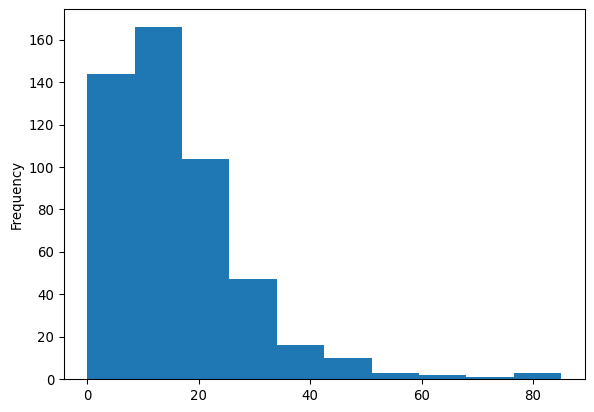

In [36]:
_ = chicago_1918["influenza"].plot.hist()

> **Assigning to `_`**
>
> `pandas` returns an object with the drawing from its plotting methods.
> Since you are in Jupyter environment, and you don’t need to work
> further with that object; you can assign it to `_`, a convention for
> an unused variable.

However, the default `pandas` plots can be a bit dull. A better option
is to use another package, called
[`seaborn`](https://seaborn.pydata.org).

In [37]:
import seaborn as sns

> **Why `sns`?**
>
> `seaborn` is, by convention, imported as `sns`. That came as a joke
> after [Samuel Normal
> Seaborn](https://en.wikipedia.org/wiki/Sam_Seaborn), a fictional
> character The West Wing show.

The same plot using `seaborn` has a more pleasant default style and more
customisability.

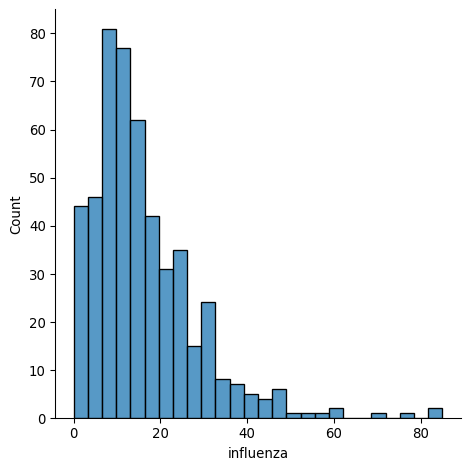

In [38]:
sns.displot(chicago_1918["influenza"])

Note you are using `sns` instead of `pd`, as the function belongs to
`seaborn` instead of `pandas`.

You can quickly see most of the areas have seen somewhere between 0 and
60 cases, approx. However, there are a few areas that have more, up to
more than 80 cases.

### Kernel Density Plots

Histograms are useful, but they are artificial in the sense that a
continuous variable is made discrete by turning the values into discrete
groups. An alternative is kernel density estimation (KDE), which
produces an empirical density function:

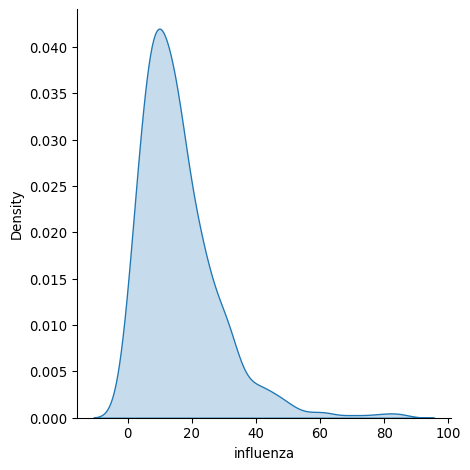

In [39]:
sns.displot(chicago_1918["influenza"], kind="kde", fill=True)


### Line and bar plots

Another very common way of visually displaying a variable is with a line
or a bar chart. For example, if you want to generate a line plot of the
(sorted) total cases by area:

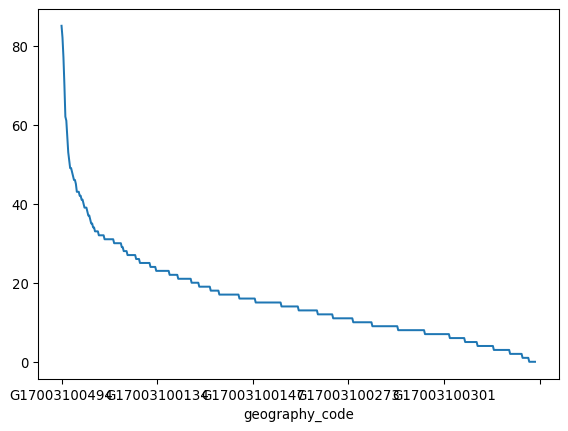

In [40]:
_ = chicago_1918["influenza"].sort_values(ascending=False).plot()

For a bar plot all you need to do is to change from `plot` to
`plot.bar`. Since there are many census tracts, let us plot only the ten
largest ones (which you can retrieve with `head`):

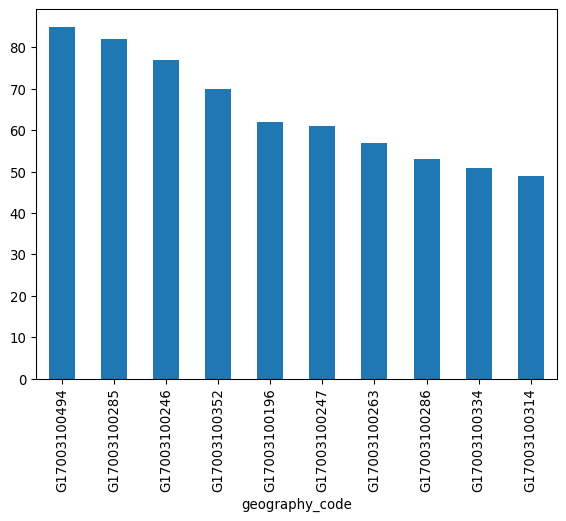

In [41]:
_ = chicago_1918["influenza"].sort_values(ascending=False).head(10).plot.bar()

You can turn the plot around by displaying the bars horizontally (see
how it’s just changing `bar` for `barh`). Let’s display now the top 50
areas and, to make it more readable, let us expand the plot’s height:

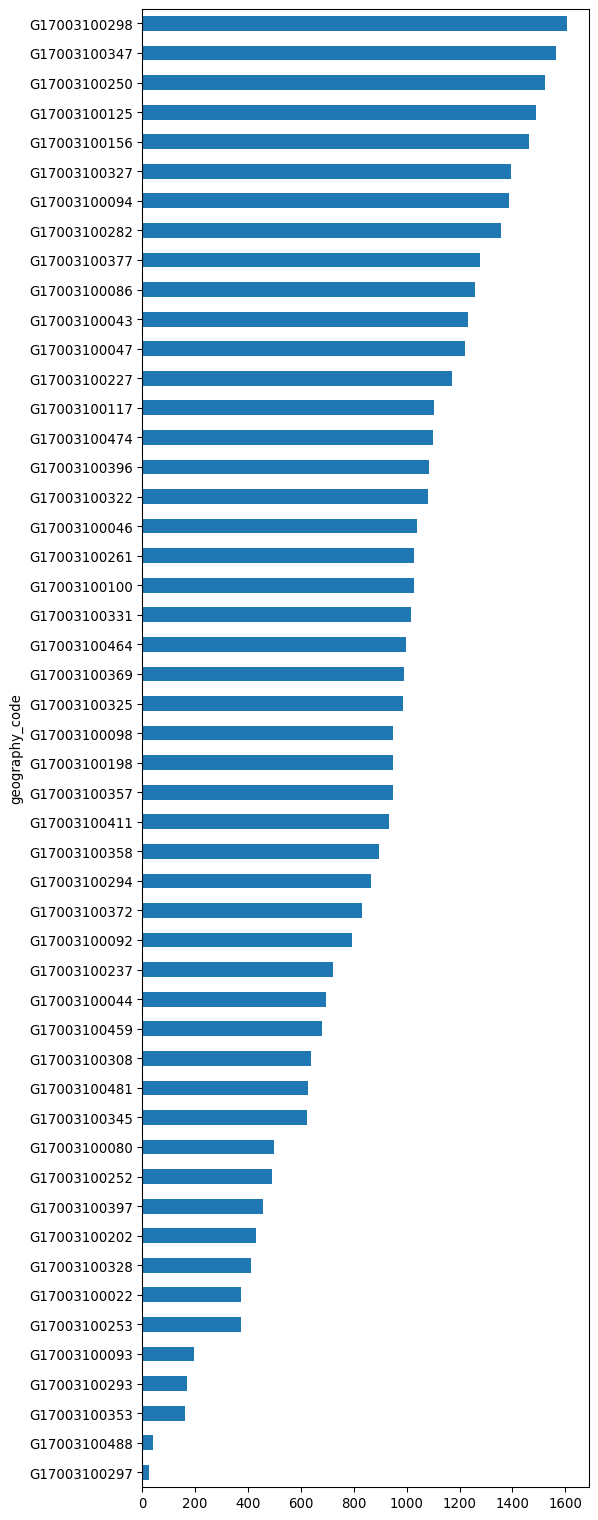

In [42]:
_ = (
    chicago_1918["total_population"]
    .sort_values()
    .head(50)
    .plot.barh(figsize=(6, 20))
)

> **One line or multiple lines?**
>
> You may have noticed that in some cases, the code is on a single line,
> but longer code is split into multiple lines. Python requires you to
> follow the [indentation rules](https://peps.python.org/pep-0008/), but
> apart from that, there are not a lot of other limits.

## Tidy data

> **Caution**
>
> This section is a bit more advanced and hence considered optional.
> Feel free to skip it, move to the next, and return later when you feel
> more confident.

Once you can read your data in, explore specific cases, and have a first
visual approach to the entire set, the next step can be preparing it for
more sophisticated analysis. Maybe you are thinking of modeling it
through regression, or on creating subgroups in the dataset with
particular characteristics, or maybe you simply need to present summary
measures that relate to a slightly different arrangement of the data
than you have been presented with.

For all these cases, you first need what statistician, and general R
wizard, Hadley Wickham calls *“tidy data”*. The general idea to “tidy”
your data is to convert them from whatever structure they were handed in
to you into one that allows convenient and standardized manipulation,
and that supports directly inputting the data into what he calls
“*tidy*” analysis tools. But, at a more practical level, what is exactly
*“tidy data”*? In Wickham’s own words:

> *Tidy data is a standard way of mapping the meaning of a dataset to
> its structure. A dataset is messy or tidy depending on how rows,
> columns and tables are matched up with observations, variables and
> types.*

He then goes on to list the three fundamental characteristics of *“tidy
data”*:

1.  Each variable forms a column.
2.  Each observation forms a row.
3.  Each type of observational unit forms a table.

If you are further interested in the concept of *“tidy data”*, I
recommend you check out the [original
paper](http://www.jstatsoft.org/v59/i10/) (open access) and the [public
repository](https://github.com/hadley/tidy-data) associated with it.

Let us bring in the concept of “*tidy data*” to our own Chicago dataset.
First, remember its structure:

In [43]:
chicago_1918.head()

Thinking through *tidy* lenses, this is not a tidy dataset. It is not so
for each of the three conditions:

-   Starting by the last one (*each type of observational unit forms a
    table*), this dataset actually contains not one but many
    observational units: the different areas of Chicago, captured by
    `geography_code`; *and* different observatoins for each area. To
    *tidy* up this aspect, you can create separate tables. You will
    probably want population groups divided by age as one tidy table and
    flu rates as another. Start by extracting relevant columns.

In [44]:
influenza_rates = chicago_1918[["influenza"]]
influenza_rates.head()


In [45]:
population = chicago_1918.loc[:, "agecat1":"agecat7"]
population.head()

At this point, the table `influenza_rates` is tidy: every row is an
observation, every table is a variable, and there is only one
observational unit in the table.

The other table (`population`), however, is not entirely tidied up yet:
there is only one observational unit in the table, true; but every row
is not an observation, and there are variable values as the names of
columns (in other words, every column is not a variable). To obtain a
fully tidy version of the table, you need to re-arrange it in a way that
every row is an age category in an area, and there are three variables:
`geography_code`, age category, and population count (or frequency).

Because this is actually a fairly common pattern, there is a direct way
to solve it in `pandas`:

In [46]:
tidy_population = population.stack()
tidy_population.head()

geography_code         
G17003100001    agecat1     46
                agecat2    274
                agecat3    257
                agecat4    311
                agecat5    222
dtype: int64

The method `stack`, well, “stacks” the different columns into rows. This
fixes our “tidiness” problems but the type of object that is returning
is not a `DataFrame`:

In [47]:
type(tidy_population)

pandas.core.series.Series

It is a `Series`, which really is like a `DataFrame`, but with only one
column. The additional information (`geography_code` and age category)
are stored in what is called an multi-index. You will skip these for
now, so you would really just want to get a `DataFrame` as you know it
out of the `Series`. This is also one line of code away:

In [48]:
tidy_population_df = tidy_population.reset_index()
tidy_population_df.head()

To which you can apply to renaming to make it look better:

In [49]:
tidy_population_df = tidy_population_df.rename(
    columns={"level_1": "age_category", 0: "count"}
)
tidy_population_df.head()

Now our table is fully tidied up!

## Grouping, transforming, aggregating

One of the advantage of tidy datasets is they allow to perform advanced
transformations in a more direct way. One of the most common ones is
what is called “group-by” operations. Originated in the world of
databases, these operations allow you to group observations in a table
by one of its labels, index, or category, and apply operations on the
data group by group.

For example, given our tidy table with age categories, you might want to
compute the total sum of the population by each category. This task can
be split into two different ones:

-   Group the table in each of the different subgroups.
-   Compute the sum of `count` for each of them.

To do this in `pandas`, meet one of its workhorses, and also one of the
reasons why the library has become so popular: the `groupby` operator.

In [50]:
pop_grouped = tidy_population_df.groupby("age_category")
pop_grouped

The object `pop_grouped` still hasn’t computed anything. It is only a
convenient way of specifying the grouping. But this allows us then to
perform a multitude of operations on it. For our example, the sum is
calculated as follows:

In [51]:
pop_grouped.sum(numeric_only=True)


Similarly, you can also obtain a summary of each group:

In [52]:
pop_grouped.describe()

You will not get into it today as it goes beyond the basics this chapter
wants to cover, but keep in mind that `groupby` allows you to not only
call generic functions (like `sum` or `describe`), but also your own
functions. This opens the door for virtually any kind of transformation
and aggregation possible.

> **Additional reading**
>
> -   A good introduction to data manipulation in Python is Wes
>     McKinney’s “[Python for Data
>     Analysis](https://wesmckinney.com/book/pandas-basics)”
>     \[@mckinney2012python\].
> -   To explore further some of the visualization capabilities in at
>     your fingertips, the Python library `seaborn` is an excellent
>     choice. Its online
>     [tutorial](https://seaborn.pydata.org/tutorial.html) is a
>     fantastic place to start.
> -   A good extension is Hadley Wickham’s “Tidy data” paper
>     \[@wickham2014tidy\], which presents a very popular way of
>     organising tabular data for efficient manipulation.

## Acknowledgements

This section is derived from *A Course on Geographic Data Science* by
@darribas_gds_course, licensed under CC-BY-SA 4.0. The text was slightly
adapted, mostly to accommodate a different dataset used.